# Implementing Linear Regression using scikit-learn
* We'll implement linear regression using scikit-learn
* We'll use Stochastic Gradient Descent
* We'll use the diabetes data from scikit-learn

# Step 1: Loading the data

In [1]:
from sklearn.datasets import load_diabetes
# Importing the dataset
from sklearn import datasets
import numpy as np
diabetes = datasets.load_diabetes()

# We'll only get 30 samples for testing
test_samples = 30

# Declaring the training data
X_train = diabetes.data[:-test_samples, :]
y_train = diabetes.target[:-test_samples]

# Declaring the test data
X_test = diabetes.data[-test_samples:, :]
y_test = diabetes.target[-test_samples:]

# Step 2: Preparing the model and training the regressor using the dataset

In [2]:
# Using the SGD-based regression algorithm
from sklearn.linear_model import SGDRegressor

# Loading an SGDRegressor model
regressor = SGDRegressor(loss = 'squared_error', penalty= "l2", alpha = 0.0001,
                         learning_rate = 'constant', eta0 = 0.001, max_iter =
                         100_000)

# Fitting the data
regressor.fit(X_train, y_train)



SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=100000)

## Step 3: Making predictions and evaluating the model

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the metrics
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  2191.468114466777
Root Mean Squared Error:  46.81311904228105
Mean Absolute Error:  39.137516462092094
R-squared:  0.5746547375850796


In [4]:
print(f"Our predicted values\n: {predictions}")

print(f"The real target values\n: {y_test}")

Our predicted values
: [221.85327283 125.24539529 181.52807075 170.50830359 213.41267223
 148.0821711  115.71914256  92.81912975 153.80790489 194.35595934
 190.94371342 161.42976793 171.95701237  97.34918309 178.79787198
 135.47158132 255.14781501 106.68756624 124.53457547 127.3508323
 214.75468028  76.35287204 139.03867183 123.29529434  60.98776765
 187.75229788 128.33188461 136.60034201 193.02920902  64.24994074]
The real target values
: [261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111. 152.
 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104. 132.
 220.  57.]


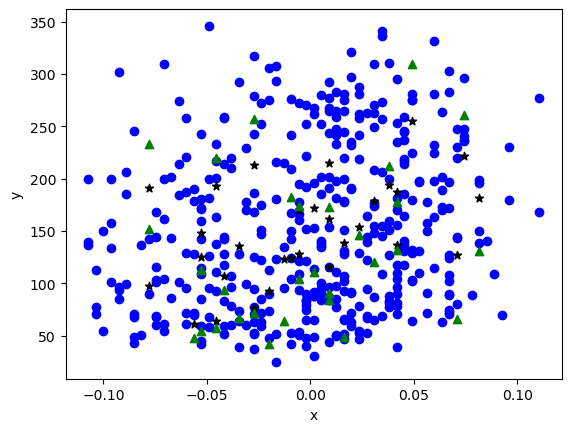

In [6]:
# Checking the model's performance on new samples
import matplotlib.pyplot as plt


# Plotting both the train values and the new predicted values
plt.scatter(X_train[:, 0], y_train, marker = "o", c = "b")
plt.scatter(X_test[:, 0], predictions, marker = "*", c = "k")
plt.scatter(X_test[:, 0], y_test, marker = "^", c = "g")

# plt.xlim(0, 5)
# plt.ylim(0, 1.75)

plt.xlabel("x")
plt.ylabel("y")

plt.show()